In [19]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
df = pd.read_csv('/content/drive/MyDrive/diamonds.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2

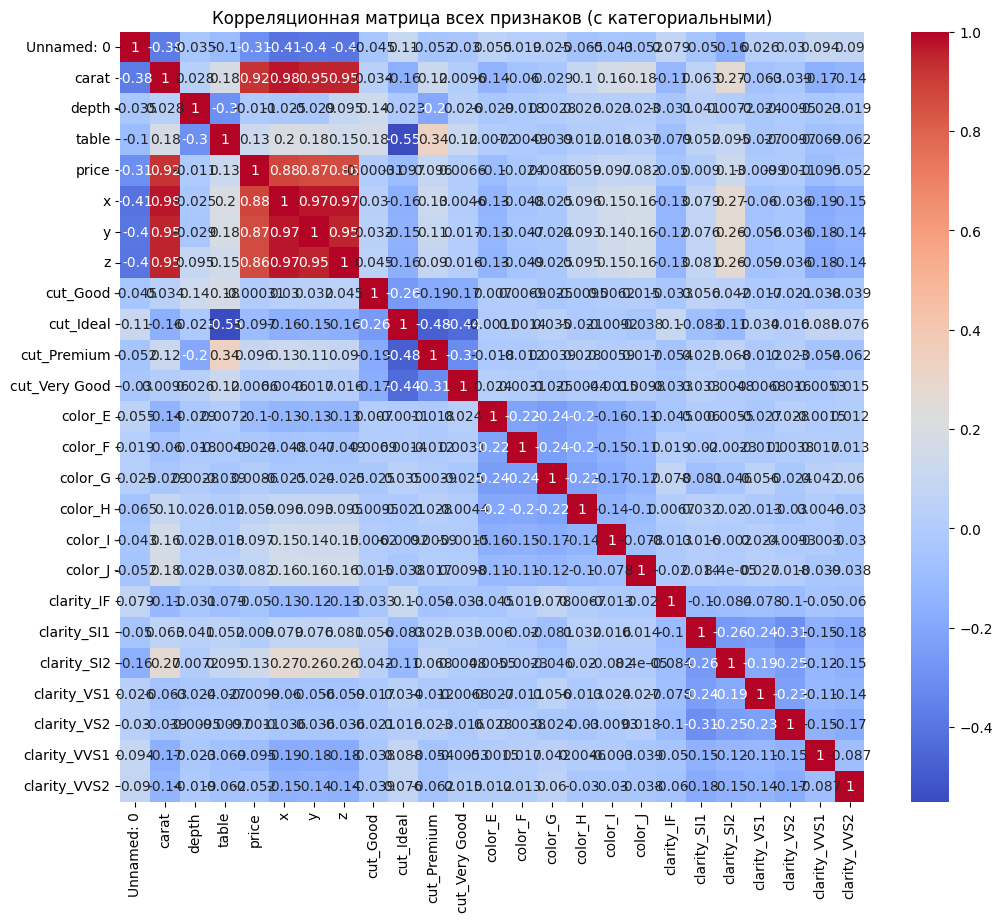

In [21]:
# Основная информация о данных
print(df.info())

# Статистическая информация о числовых колонках
print(df.describe())

# Проверка на наличие пропущенных данных
print(df.isnull().sum())

# Корреляционная матрица для поиска важных признаков
import seaborn as sns
import matplotlib.pyplot as plt

# Преобразование категориальных данных в числовые
df_encoded = pd.get_dummies(df, drop_first=True)

# Корреляционная матрица для всех данных (включая преобразованные категориальные)
plt.figure(figsize=(12, 10))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Корреляционная матрица всех признаков (с категориальными)")
plt.show()


In [27]:
# Удаление неинформативного столбца 'Unnamed: 0' (если он существует)
df = df.drop(columns=['Unnamed: 0'], errors='ignore')

# Преобразование категориальных данных в числовые с помощью One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Разделение на признаки (X) и целевую переменную (y)
X = df.drop('price', axis=1)
y = df['price']

# Разделение данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Стандартизация данных
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [28]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Список моделей для анализа
models = {
    'Linear Regression': LinearRegression(),
    'Polynomial Regression (degree=2)': make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regression': SVR(kernel='linear'),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Bayesian Linear Regression': BayesianRidge()
}


In [29]:
from sklearn.metrics import r2_score

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)

    print(f'{model_name}:')
    print(f'R² на тренировочных данных: {r2_train:.4f}')
    print(f'R² на тестовых данных: {r2_test:.4f}\n')
    return r2_test

# Оценим каждую модель
results = {}
for model_name, model in models.items():
    r2_test = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test, model_name)
    results[model_name] = r2_test


Linear Regression:
R² на тренировочных данных: 0.9196
R² на тестовых данных: 0.9202

Polynomial Regression (degree=2):
R² на тренировочных данных: 0.9711
R² на тестовых данных: 0.8961

Decision Tree:
R² на тренировочных данных: 1.0000
R² на тестовых данных: 0.9567

Random Forest:
R² на тренировочных данных: 0.9965
R² на тестовых данных: 0.9756

Support Vector Regression:
R² на тренировочных данных: 0.8681
R² на тестовых данных: 0.8699

Ridge Regression:
R² на тренировочных данных: 0.9196
R² на тестовых данных: 0.9202

Lasso Regression:
R² на тренировочных данных: 0.9196
R² на тестовых данных: 0.9202

ElasticNet Regression:
R² на тренировочных данных: 0.8322
R² на тестовых данных: 0.8351

Bayesian Linear Regression:
R² на тренировочных данных: 0.9196
R² на тестовых данных: 0.9202



Высокие значения R² для дерева решений и случайного леса указывают на переобучение (R² на тренировочных данных значительно выше, чем на тестовых).

Полиномиальная регрессия показала высокое значение на тренировочных данных, но её производительность на тестовых данных заметно ниже, что также может указывать на переобучение.

Необходимо проанализировть другие метрики, такие как средняя абсолютная ошибка (MAE) или средняя квадратичная ошибка (MSE), для более полной оценки производительности моделей.

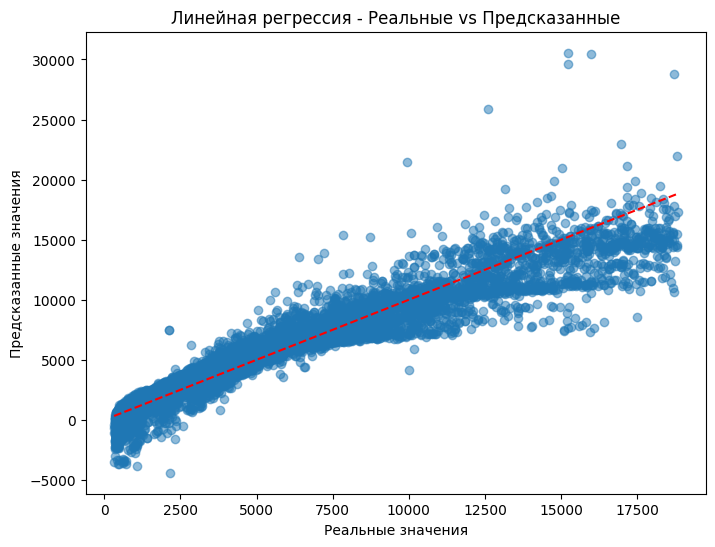

In [30]:
# Визуализация для линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия - Реальные vs Предсказанные')
plt.show()


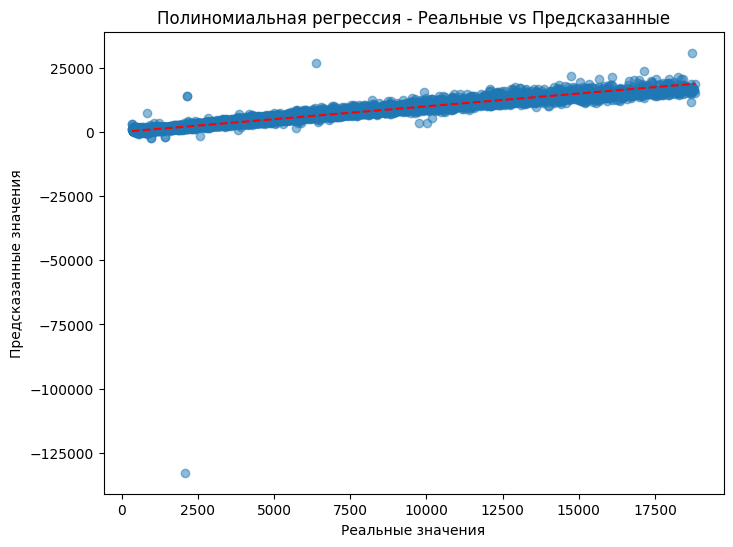

In [31]:
# Визуализация для полиномиальной регрессии
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Полиномиальная регрессия - Реальные vs Предсказанные')
plt.show()

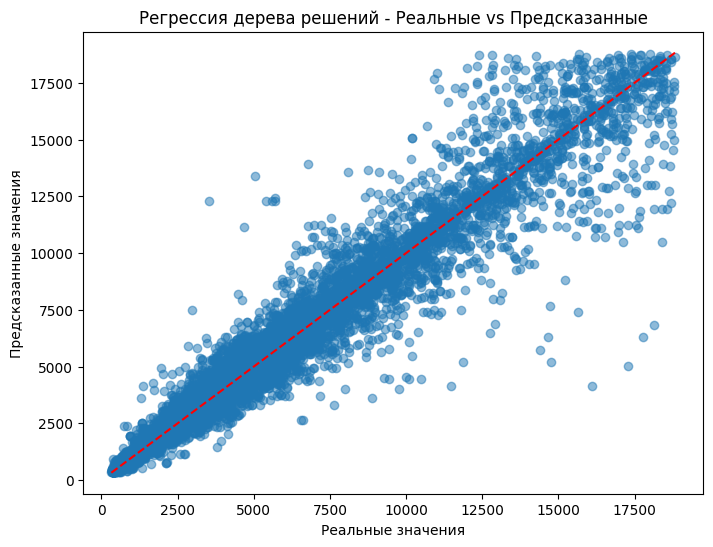

In [32]:
# Визуализация для регрессии дерева решений
model = DecisionTreeRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия дерева решений - Реальные vs Предсказанные')
plt.show()

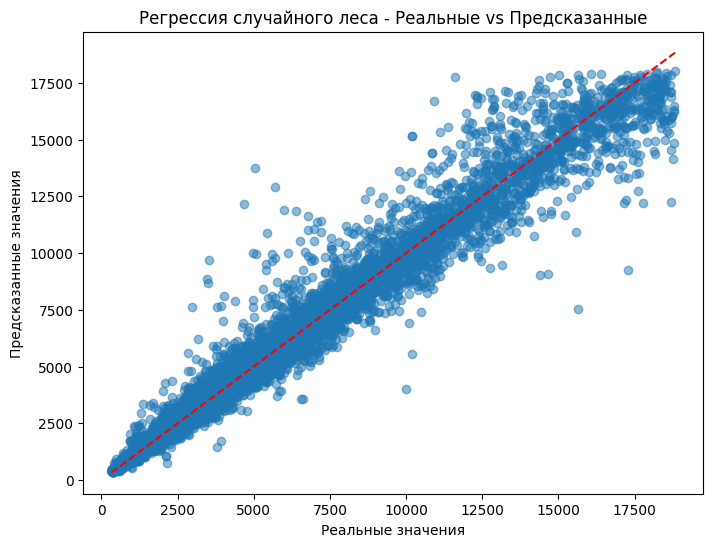

In [33]:
# Визуализация для регрессии случайного леса
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия случайного леса - Реальные vs Предсказанные')
plt.show()

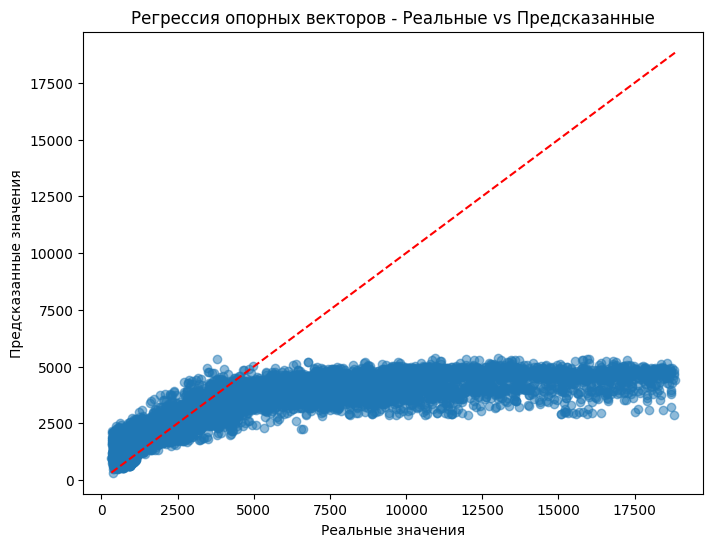

In [34]:
# Визуализация для регрессии опорных векторов
model = SVR()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия опорных векторов - Реальные vs Предсказанные')
plt.show()

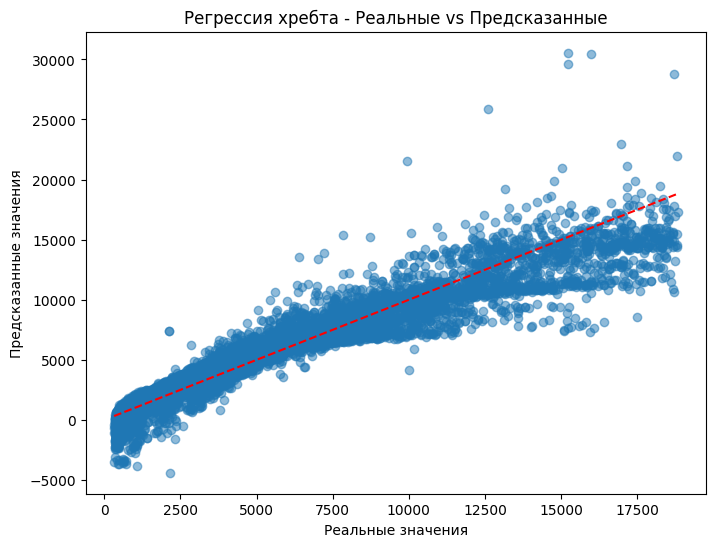

In [35]:
# Визуализация для регрессии хребта
model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия хребта - Реальные vs Предсказанные')
plt.show()

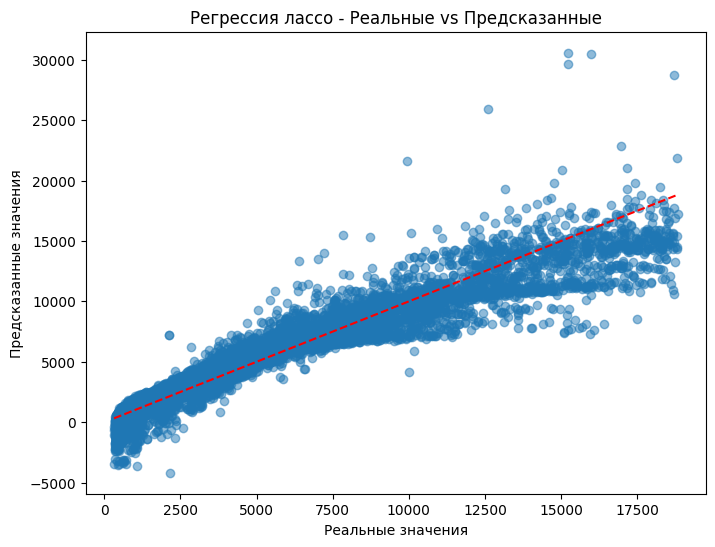

In [36]:
# Визуализация для регрессии лассо
model = Lasso()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия лассо - Реальные vs Предсказанные')
plt.show()

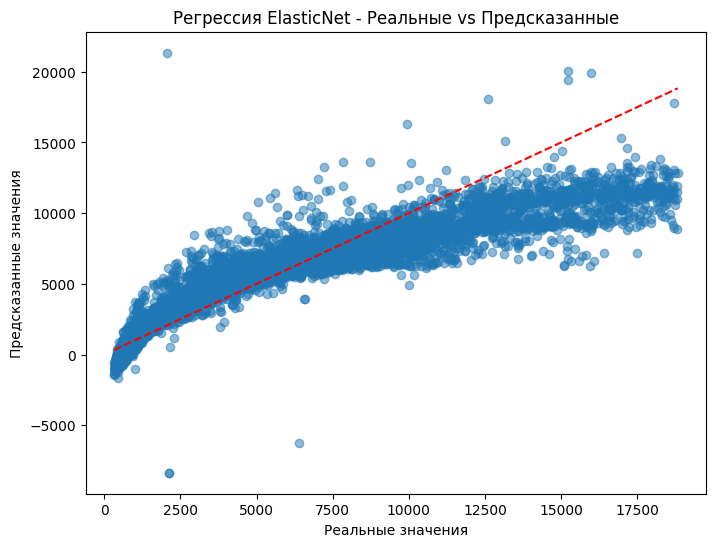

In [37]:
# Визуализация для регрессии ElasticNet
model = ElasticNet()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Регрессия ElasticNet - Реальные vs Предсказанные')
plt.show()

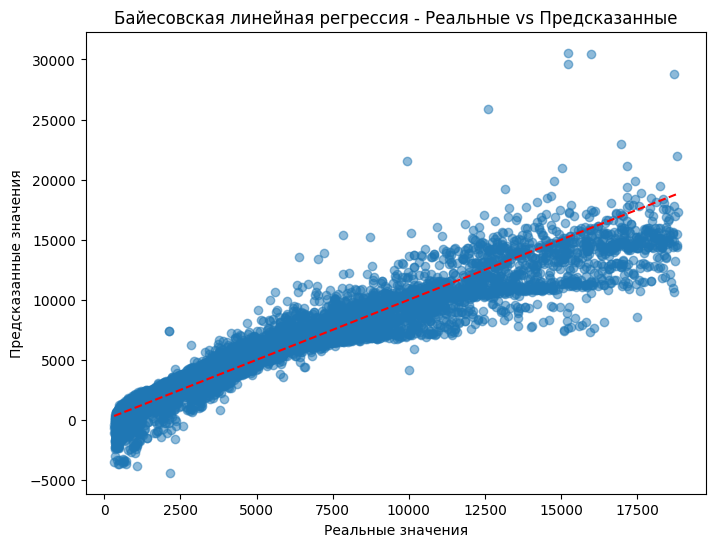

In [38]:
# Визуализация для байесовской линейной регрессии
model = BayesianRidge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Реальные значения')
plt.ylabel('Предсказанные значения')
plt.title('Байесовская линейная регрессия - Реальные vs Предсказанные')
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, ElasticNet, BayesianRidge

# Функция для оценки модели
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    r2_train = model.score(X_train, y_train)
    r2_test = model.score(X_test, y_test)

    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)

    return r2_train, r2_test, mae_train, mae_test, mse_train, mse_test

# Создание списка моделей для оценки
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Support Vector Regression': SVR(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Bayesian Linear Regression': BayesianRidge(),
}

# Оценка линейной регрессии
linear_model = LinearRegression()
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = evaluate_model(linear_model, X_train_scaled, X_test_scaled, y_train, y_test)
results = {
    'Linear Regression': {
        'R² Train': r2_train,
        'R² Test': r2_test,
        'MAE Train': mae_train,
        'MAE Test': mae_test,
        'MSE Train': mse_train,
        'MSE Test': mse_test
    }
}

# Оценка полиномиальной регрессии
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
poly_model = LinearRegression()
r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = evaluate_model(poly_model, X_train_poly, X_test_poly, y_train, y_test)
results['Polynomial Regression (degree=2)'] = {
    'R² Train': r2_train,
    'R² Test': r2_test,
    'MAE Train': mae_train,
    'MAE Test': mae_test,
    'MSE Train': mse_train,
    'MSE Test': mse_test
}

# Оценка остальных моделей
for model_name, model in models.items():
    if model_name != 'Linear Regression' and model_name != 'Polynomial Regression (degree=2)':
        r2_train, r2_test, mae_train, mae_test, mse_train, mse_test = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
        results[model_name] = {
            'R² Train': r2_train,
            'R² Test': r2_test,
            'MAE Train': mae_train,
            'MAE Test': mae_test,
            'MSE Train': mse_train,
            'MSE Test': mse_test
        }

# Вывод результатов
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        print(f"  {metric_name}: {value:.4f}")
    print()  # Пустая строка для разделения


Linear Regression:
  R² Train: 0.9196
  R² Test: 0.9202
  MAE Train: 746.0332
  MAE Test: 734.2415
  MSE Train: 1290541.9147
  MSE Test: 1244765.4357

Polynomial Regression (degree=2):
  R² Train: 0.9711
  R² Test: 0.8961
  MAE Train: 411.4665
  MAE Test: 419.4763
  MSE Train: 463380.2060
  MSE Test: 1619991.0407

Decision Tree:
  R² Train: 1.0000
  R² Test: 0.9563
  MAE Train: 0.4715
  MAE Test: 389.5434
  MSE Train: 82.5261
  MSE Test: 681286.1361

Random Forest:
  R² Train: 0.9965
  R² Test: 0.9755
  MAE Train: 110.9168
  MAE Test: 295.4595
  MSE Train: 55731.7893
  MSE Test: 382789.9016

Support Vector Regression:
  R² Train: 0.3013
  R² Test: 0.3114
  MAE Train: 1811.8136
  MAE Test: 1763.6677
  MSE Train: 11214406.6607
  MSE Test: 10738877.5881

Ridge Regression:
  R² Train: 0.9196
  R² Test: 0.9202
  MAE Train: 746.0943
  MAE Test: 734.2910
  MSE Train: 1290543.2466
  MSE Test: 1244734.0861

Lasso Regression:
  R² Train: 0.9196
  R² Test: 0.9202
  MAE Train: 745.6385
  MAE Test:

1. Линейная регрессия

    R²: 0.9196 (train), 0.9202 (test)
    Высокие значения R² на тренировочных и тестовых данных указывают на хорошую подгонку модели к данным.

    MAE: 746.03 (train), 734.24 (test)
    Низкие значения MAE показывают, что предсказания модели близки к реальным значениям.

    MSE: 1,290,541.91 (train), 1,244,765.44 (test)
    Низкие значения MSE подтверждают точность модели, однако не так чувствительны к выбросам.

2. Полиномиальная регрессия (степень=2)

    R²: 0.9711 (train), 0.8961 (test)
    Высокое значение R² на тренировочных данных указывает на переобучение модели, поскольку производительность на тестовых данных значительно ниже.

    MAE: 411.47 (train), 419.48 (test)
    MAE показывает, что модель более точно предсказывает значения на тренировочных данных по сравнению с тестовыми данными.

    MSE: 463,380.21 (train), 1,619,991.04 (test)
    Высокое значение MSE на тестовых данных подтверждает наличие переобучения.

3. Дерево решений

    R²: 1.0000 (train), 0.9563 (test)
    Полное соответствие модели тренировочным данным указывает на сильное переобучение. Однако модель все еще демонстрирует хорошие результаты на тестовых данных.

    MAE: 0.47 (train), 389.54 (test)
    MAE на тренировочных данных близко к нулю, что говорит о переобучении. Значение на тестовых данных значительно выше.

    MSE: 82.53 (train), 681,286.14 (test)
    Похожая ситуация с MSE: высокая ошибка на тестовых данных указывает на плохую обобщающую способность.

4. Случайный лес

    R²: 0.9965 (train), 0.9755 (test)
    Высокие значения R² указывают на хорошую подгонку, но, как и в случае с деревом решений, наблюдается небольшое переобучение.

    MAE: 110.92 (train), 295.46 (test)
    Низкие значения MAE показывают хорошую производительность модели.

    MSE: 55,731.79 (train), 382,789.90 (test)
    Значение MSE на тестовых данных является приемлемым, но все же выше, чем на тренировочных данных.

5. Регрессия с поддерживающими векторами

    R²: 0.3013 (train), 0.3114 (test)
    Очень низкие значения R² показывают плохую подгонку модели к данным.

    MAE: 1,811.81 (train), 1,763.67 (test)
    Высокие значения MAE подтверждают слабую производительность модели.

    MSE: 11,214,406.66 (train), 10,738,877.59 (test)
    Высокие значения MSE говорят о большой ошибке предсказания, что указывает на неподходящую модель для данных.

6. Регрессия Риджа, Лассо, ElasticNet и Байесовская линейная регрессия

    R²: Все модели показывают результаты, близкие к линейной регрессии (в пределах 0.83-0.92).

    MAE и MSE: Эти метрики показывают аналогичное поведение для Риджа, Лассо и Байесовской регрессии с MAE и MSE, близкими к линейной регрессии.Однако ElasticNet имеет несколько более высокие значения MAE и MSE, что указывает на меньшую производительность.

7. Выводы

    Переобучение: Модели, такие как дерево решений и случайный лес, показывают признаки переобучения, так как их производительность на тестовых данных значительно ниже, чем на тренировочных.

    Полиномиальная регрессия: Несмотря на высокие значения R² на тренировочных данных, плохая производительность на тестовых данных говорит о переобучении. Следует использовать более низкие степени полинома или другие методы регуляризации.

    Неподходящая модель: Регрессия с поддерживающими векторами показывает плохие результаты и может не подходить для данного типа данных.

    Лучшие модели: Линейная регрессия и случайный лес показывают лучшие результаты по всем метрикам, особенно случайный лес с R² на тестовых данных около 0.9755.